# Feature Object

```cmda.feature_extraction.Features``` is a tool for extracting multiple features at the same time from a numeric signal ```x```.
User can select from a wide variety of built-in features, as well as adding user-defined features. This functionality makes it possible to tailor the features based on the application.

In the following sections, we can see examples of time domain, frequency domain and user defined feature extraction. 

## The Data

We start by using a sample data contains an ECG signal and ABP (Arterial Blood Pressure) signal with a length of 10 seconds and 125 Hz sampling rate.
The toy data can be accessed from ```cmda.data.ecg_abp_sample```.

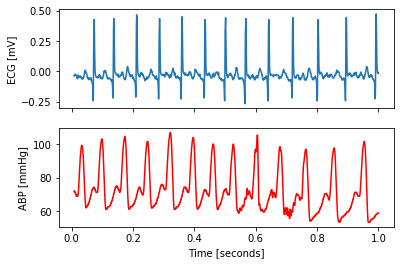

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from cmda.data import ecg_apb_sample

data = ecg_apb_sample()

ecg = data["ECG"]
abp = data["ABP"]

fs = 125
t = np.linspace(1, 1 / fs, len(ecg))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t, ecg)
ax1.set_ylabel("ECG [mV]")
ax2.plot(t, abp, c="red")
ax2.set_ylabel("ABP [mmHg]")
ax2.set_xlabel("Time [seconds]")
plt.show()

## Time-Domain Feature Extraction

In this example, we extract some [built-in time-domain features](../features/time_domain.md) of the ABP signal. To start, we must call the ```cmda.feature_extraction.Features``` object and add the desired features, using the ```add``` function.

In [2]:
from cmda.feature_extraction import Features
from cmda.data import ecg_apb_sample

data = ecg_apb_sample()
x = data["ABP"]

feature = Features()

# add built-in time-domain features
feature.add.mean()
feature.add.max()
feature.add.min()
feature.add.median()
feature.add.skewness()
feature.add.kurtosis()
feature.add.std()
feature.add.p2p()
feature.add.zcr(center=True)

After adding the features, we apply the ```transform``` function to the signal and get the features. The ```transform``` function returns the extracted features as a python dictionary.

In [3]:
feature.transform(x=x, fs=125)

{'mean': 72.385,
 'max': 107.03125,
 'min': 53.125,
 'median': 69.53125,
 'skewness': 0.9154627781784881,
 'kurtosis': -0.15299373030467667,
 'std': 13.268216310510619,
 'p2p': 53.90625,
 'zcr': 42}

## Frequency-Domain Feature Extraction

In this example, we extract some [built-in frequency-domain features](../features/frequency_domain.md) of the ECG signal. Like the previous example, we call the ```cmda.feature_extraction.Features``` object, and add the desired features, using the ```add``` function.

In [4]:
from cmda.feature_extraction import Features
from cmda.data import ecg_apb_sample

data = ecg_apb_sample()
x = data["ECG"]

feature = Features()

# add frequency-domain built-in features
feature.add.mnf(spectrum="ps")
feature.add.mdf(spectrum="ps")
feature.add.stdf(spectrum="ps")
feature.add.psr(spectrum="welch", int_limit_ratio=0.01)
feature.add.peaks(spectrum="welch", n_peaks=1, height=True, width=True)
feature.add.band_sum(spectrum="ps", low=1, high=7)
feature.add.band_mnf(spectrum="ps", low=1, high=7)

After adding the features, we apply the ```transform``` function to the signal and get the features. The ```transform``` function returns the extracted features as a python dictionary.

In [5]:
feature.transform(x=x, fs=125)

{'mnf': 9.857968968908676,
 'mdf': 9.0,
 'stdf': 6.657686374206612,
 'psr_0.01': 0.1086823980353686,
 'peak_freq_1': 3.90625,
 'peak_height_1': 0.0009058970155242925,
 'peak_width_1': 4.386465062242469,
 'band_sum': 0.3921784430303598,
 'band_mnf': 4.277888519896743}

## User-defiend Feature Extraction

In this section, we extract some features including a user-defined feature from the ABP signal. Like the previous example, we call the cmda.feature_extraction.Features object, Define the feature and add them to the feature object, using ```add_udf``` function.

In [6]:
import numpy as np
from cmda.feature_extraction import Features
from cmda.data import ecg_apb_sample

data = ecg_apb_sample()
x = data["ABP"]

# Define the feature
# Please take note, that the output must be a dictionary
# ,where the keys are the extracted features
def quantile(x,low = 0.25,high =0.75):
    q_low = np.quantile(x,q=low)
    q_high = np.quantile(x,q=high)
    
    res = {"q_low":q_low, "q_high":q_high}
    return res


# Call the Feature object
feature = Features()

# add built-in features
feature.add.mean()
feature.add.max()
feature.add.zcr(center=True)
feature.add.mnf(spectrum="ps")

# add user-defined feature
feature.add_udf(quantile)

After adding the features, we apply the ```transform``` function to the signal and get the features. The ```transform``` function returns the extracted features as a python dictionary.

In [7]:
feature.transform(x=x, fs=125)

{'mean': 72.385,
 'max': 107.03125,
 'zcr': 42,
 'mnf': 2.0056974184541025,
 'q_low': 62.5,
 'q_high': 75.78125}